Evelyn Komalasari H //
0706022310001

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from kneed import KneeLocator
import seaborn as sns

# Exploratory Data Analysis

In [2]:
# load dataset
url = "https://raw.githubusercontent.com/NathaliaMinoque/datasets/refs/heads/main/mall_customers.csv"
df_raw = pd.read_csv(url)
df_raw.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [3]:
df_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [4]:
df_raw.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [5]:
# rename the Income($)	column
df_raw = df_raw.rename(columns={"Annual Income (k$)": "AnnualIncome"})
df_raw = df_raw.rename(columns={"Spending Score (1-100)": "SpendingScore"})
df_raw.head()

,CustomerID,Gender,Age,AnnualIncome,SpendingScore
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [6]:
# duplicate df
df = df_raw.copy()

from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import OrdinalEncoder

# 1. One-Hot Encoding
# Columns: Attrition, Gender, OverTime

one_hot_map = {
    'Gender': {'Female': 0, 'Male': 1},
}

for col, mapping in one_hot_map.items():
    df[col] = df[col].map(mapping)

df.sample(n = 5)

,CustomerID,Gender,Age,AnnualIncome,SpendingScore
136,137,0,44,73,7
64,65,1,63,48,51
5,6,0,22,17,76
13,14,0,24,20,77
11,12,0,35,19,99


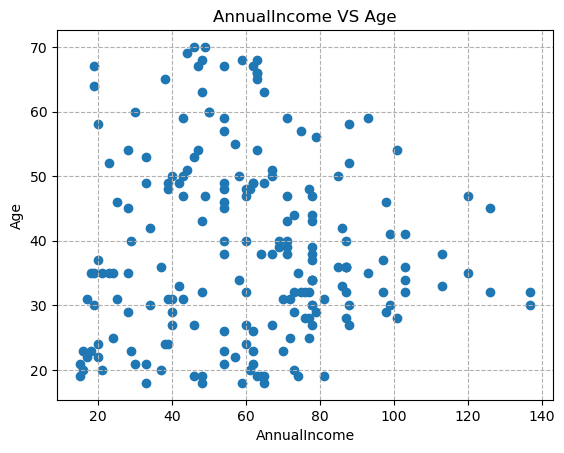

In [7]:
plt.scatter(df['AnnualIncome'], df['Age'])
plt.title('AnnualIncome VS Age')
plt.xlabel('AnnualIncome')
plt.ylabel('Age')
plt.grid(axis='both', linestyle='--')
plt.show()

From this plot, we can see that annual income doesn’t really depend on age. There are younger people earning quite a lot, and older ones with more average incomes. 

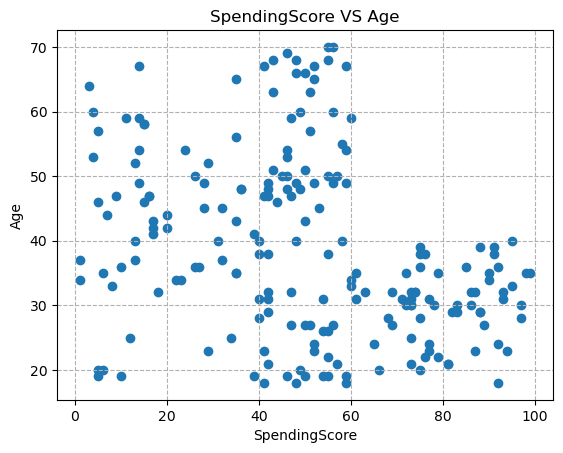

In [8]:
plt.scatter(df['SpendingScore'], df['Age'])
plt.title('SpendingScore VS Age')
plt.xlabel('SpendingScore')
plt.ylabel('Age')
plt.grid(axis='both', linestyle='--')
plt.show()

The spending score is pretty scattered across all ages. There’s no clear pattern showing that older people spend more or less.

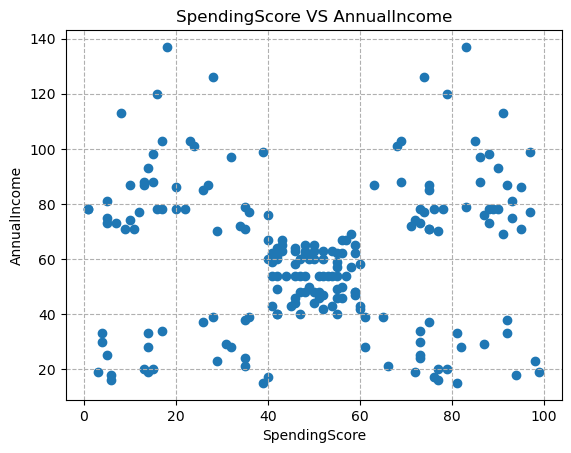

In [9]:
plt.scatter(df['SpendingScore'], df['AnnualIncome'])
plt.title('SpendingScore VS AnnualIncome')
plt.xlabel('SpendingScore')
plt.ylabel('AnnualIncome')
plt.grid(axis='both', linestyle='--')
plt.show()

It shows that spending habits don’t always match income levels. Some people earn a lot but have low spending scores, and some with lower incomes actually spend more.

In [10]:
# Removes CustomerID
df = df[['Gender', 'Age', 'AnnualIncome', 'SpendingScore']]
df.head()

,Gender,Age,AnnualIncome,SpendingScore
0,1,19,15,39
1,1,21,15,81
2,0,20,16,6
3,0,23,16,77
4,0,31,17,40


# Data Scaling (Choose One)

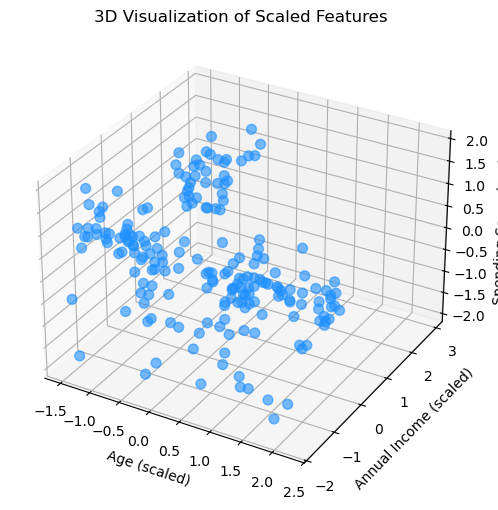

In [11]:
# scale dataset with standard scaler

from sklearn.preprocessing import StandardScaler

sc = StandardScaler()

df_sc_scaled = pd.DataFrame(sc.fit_transform(df), columns=['Gender', 'Age', 'AnnualIncome', 'SpendingScore'])

df_sc_scaled.head()

# visualization
fig = plt.figure(figsize=(8,6))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(
    df_sc_scaled["Age"],
    df_sc_scaled["AnnualIncome"],
    df_sc_scaled["SpendingScore"],
    c='dodgerblue',
    alpha=0.6,
    s=50
)
ax.set_xlabel("Age (scaled)")
ax.set_ylabel("Annual Income (scaled)")
ax.set_zlabel("Spending Score (scaled)")
ax.set_title("3D Visualization of Scaled Features")

plt.show()

After applying the standardscaler, all features were standardized to have a mean of 0 and a standard deviation of 1, making them comparable in scale. This method was chosen because k-means relies on distance, so scaling prevents variables with larger ranges from taking all of the place from the clustering process. Also the 3D visualization of the scaled features shows a more balanced distribution.

# K-Means Clustering

In [12]:
from sklearn.cluster import KMeans

c:\Users\lyn\anaconda3\Lib\site-packages\joblib\externals\loky\backend\context.py:136: UserWarning: Could not find the number of physical cores for the following reason:
[WinError 2] The system cannot find the file specified
Returning the number of logical cores instead. You can silence this warning by setting LOKY_MAX_CPU_COUNT to the number of cores you want to use.
  warnings.warn(
  File "c:\Users\lyn\anaconda3\Lib\site-packages\joblib\externals\loky\backend\context.py", line 257, in _count_physical_cores
    cpu_info = subprocess.run(
        "wmic CPU Get NumberOfCores /Format:csv".split(),
        capture_output=True,
        text=True,
    )
  File "c:\Users\lyn\anaconda3\Lib\subprocess.py", line 554, in run
    with Popen(*popenargs, **kwargs) as process:
         ~~~~~^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\lyn\anaconda3\Lib\subprocess.py", line 1039, in __init__
    self._execute_child(args, executable, preexec_fn, close_fds,
    ~~~~~~~~~~~~~~~~~~~^^^^^^^^^^^^^^^^^^^^^^^^^^

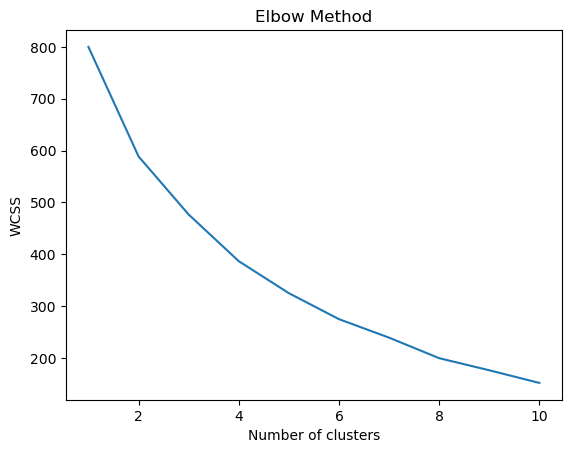

In [13]:
wcss = []
for i in range(1, 11):   #clusters 1-10
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(df_sc_scaled)
    wcss.append(kmeans.inertia_)

# Plot the elbow method graph
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [14]:
# Create a DataFrame to display the WCSS values for each number of clusters
wcss_table = pd.DataFrame({
    "Number of Clusters": range(1, 11),
    "WCSS": wcss
})

# Display the table
print(wcss_table)

   Number of Clusters        WCSS
0                   1  800.000000
1                   2  588.802677
2                   3  476.787554
3                   4  386.828426
4                   5  325.094980
5                   6  275.030671
6                   7  239.327862
7                   8  199.750461
8                   9  176.419096
9                  10  152.029834


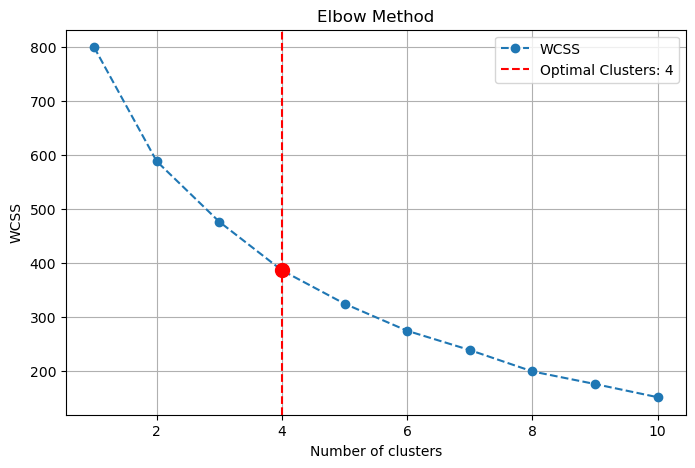

The optimal number of clusters is: 4


In [15]:
# Example WCSS values and cluster numbers
clusters = range(1, 11)

# Automatically find the elbow point using the KneeLocator
knee_locator = KneeLocator(clusters, wcss, curve="convex", direction="decreasing")
optimal_clusters = knee_locator.knee

# Plot the Elbow Method graph
plt.figure(figsize=(8, 5))
plt.plot(clusters, wcss, marker='o', linestyle='--', label="WCSS")
plt.axvline(optimal_clusters, linestyle='--', color='red', label=f'Optimal Clusters: {optimal_clusters}')
plt.scatter(optimal_clusters, wcss[optimal_clusters-1], c='red', s=100, zorder=5)  # Highlight elbow point
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.legend()
plt.grid(True)
plt.show()

# Print the optimal number of clusters
print(f"The optimal number of clusters is: {optimal_clusters}")

Based on the elbow, WCSS decreases as the number of clusters increases from 1 to 4, and then the rate decreases significantly. This tells us that adding more clusters beyond 4 does not substantially improve the model’s performance. Therefore, the “elbow point” occurs at k=4, suggesting that the optimal number of clusters for this dataset is 4.



In [16]:
# Fit K-Means to the data with the optimal number of K cluster = 3
kmeans = KMeans(n_clusters=3, init='k-means++', max_iter=300, random_state=0)
clusters = kmeans.fit_predict(df_sc_scaled)

# Add the cluster labels to the DataFrame
df['KMeans_Cluster'] = clusters

# Show the df
df.head()

c:\Users\lyn\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


,Gender,Age,AnnualIncome,SpendingScore,KMeans_Cluster
0,1,19,15,39,1
1,1,21,15,81,1
2,0,20,16,6,2
3,0,23,16,77,1
4,0,31,17,40,2


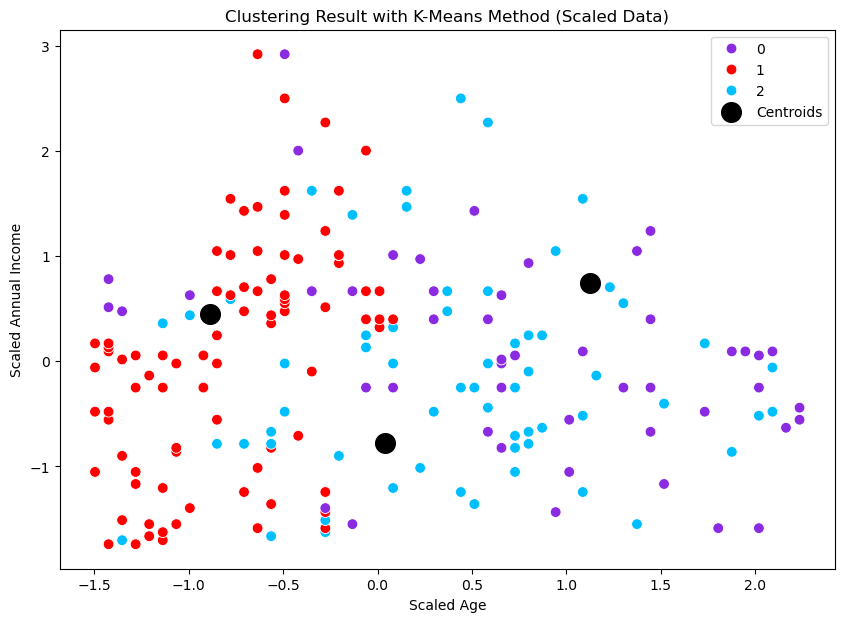

In [17]:
# visualize the result using scater chart on scaled data
plt.figure(figsize=(10,7))
sns.scatterplot(
    x="Age", 
    y="AnnualIncome", 
    hue=clusters, 
    palette=["blueviolet", "red", "deepskyblue"], 
    data=df_sc_scaled, 
    s=60
)
plt.scatter(
    kmeans.cluster_centers_[:, 0], 
    kmeans.cluster_centers_[:, 1], 
    s=200, 
    c="black", 
    label="Centroids"
)
plt.xlabel("Scaled Age")
plt.ylabel("Scaled Annual Income")
plt.title("Clustering Result with K-Means Method (Scaled Data)")
plt.legend()
plt.show()

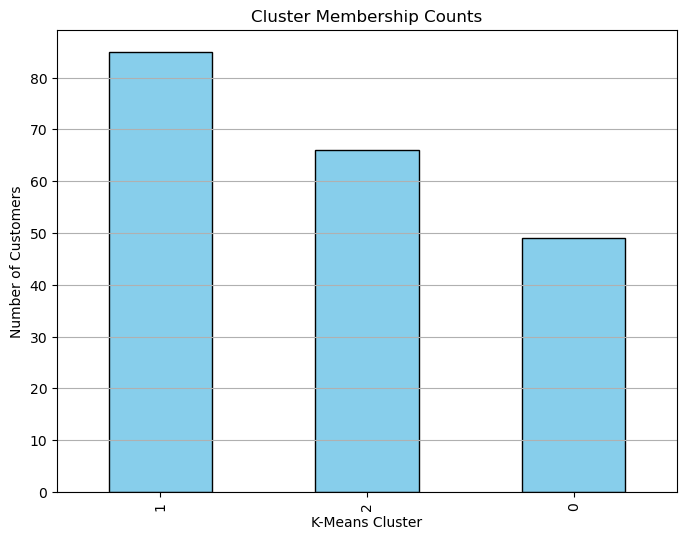

In [18]:
cluster_counts = df['KMeans_Cluster'].value_counts()

plt.figure(figsize=(8, 6))
cluster_counts.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Cluster Membership Counts')
plt.xlabel('K-Means Cluster')
plt.ylabel('Number of Customers')
plt.grid(axis='y')
plt.show()


In [21]:
# Group the data by cluster and calculate the mean spending and annual income for each cluster
cluster_summary = df.groupby(clusters).agg({'Age': ['mean', 'min', 'max'],
                                              'AnnualIncome': ['mean', 'min', 'max'],
                                              'SpendingScore': ['mean', 'min', 'max'],
                                              'Gender': [('mode', lambda x: x.mode().iloc[0]), 'min', 'max']})

cluster_summary = cluster_summary.rename_axis('KMeans_cluster')

cluster_summary

Age         AnnualIncome          SpendingScore          \
                     mean min max         mean min  max          mean min max   
KMeans_cluster                                                                  
0               49.204082  19  70    62.244898  19  137     29.734694   1  60   
1               28.047059  18  40    61.788235  15  137     72.882353  39  99   
2               45.075758  20  68    57.727273  16  126     36.181818   5  59   

               Gender          
                 mode min max  
KMeans_cluster                 
0                   1   1   1  
1                   0   0   1  
2                   0   0   0

#### Age & Gender -- Annual Income & Spending Score
Cluster 1 (Older -> Mostly Male, Low Spending)
1. Has a higher average age and moderate income, but low spending score.
2. Tends to spend less even though income isn’t low.
Managerial idea: focus on loyalty or personalized deals to encourage more spending.

Cluster 2 (Younger -> Male and Female, High Spending)
1. Shows a lower average age with similar income to others, but a much higher spending score.
2. Indicates active shoppers who respond well to marketing or new offers.
Managerial idea: use social media, online ads, and short-term promos to maintain engagement.

Cluster 3 (Middle-aged -> Mostly Female, Moderate Spending)
1. Has a mid-range age and slightly lower income, with a moderate spending score.
2. Tells us a more balanced shoppers.
Managerial idea: focus on offering value bundles, loyalty rewards, or steady discounts to retain their consistent spending behavior.

# Additional Notes

With Standard Scaler (best)

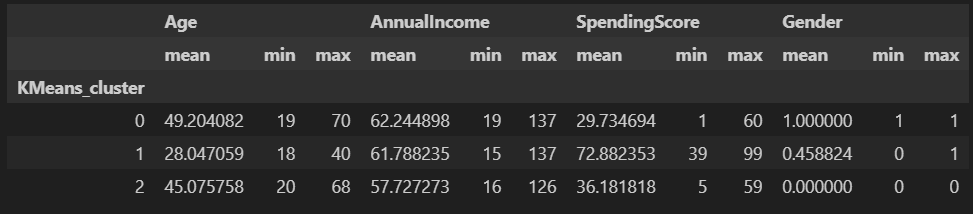

With Decimal Scaling

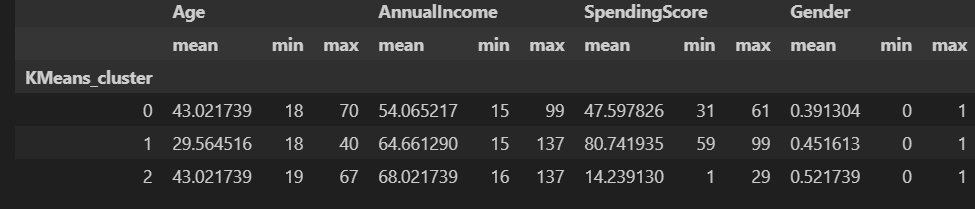

Min Max Scaler

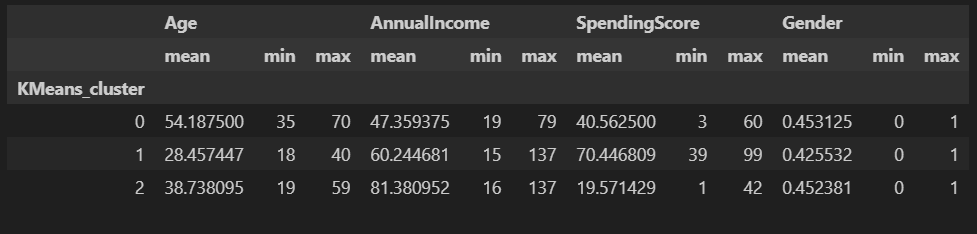